# Visualize airline network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install basemap-data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 30.5 MB 1.2 MB/s 


In [ ]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 5.1 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 17.1 MB 48.8 MB/s 
     |████████████████████████████████| 7.8 MB 56.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [ ]:
# pip install python-louvain
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
import networkx as nx
import networkx.algorithms.community as nxcom
import networkx.algorithms.approximation as nxapp
from community import community_louvain
from collections import Counter
# import graph_tool.all as gt

In [ ]:
# load network
# g = gt.collection.ns["eu_airlines"]
G = nx.read_graphml('/content/drive/MyDrive/Colab Notebooks/network.xml')

In [ ]:
layer_key  = {1: 'Lufthansa', 2: 'Ryanair', 3: 'Easyjet', 4: 'British_Airways', 5: 'Turkish_Airlines', 6: 'Air_Berlin', 7: 'Air_France', 8: 'Scandinavian_Airlines', 9: 'KLM', 10: 'Alitalia', 11: 'Swiss_International_Air_Lines', 12: 'Iberia', 13: 'Norwegian_Air_Shuttle', 14: 'Austrian_Airlines', 15: 'Flybe', 16: 'Wizz_Air', 17: 'TAP_Portugal', 18: 'Brussels_Airlines', 19: 'Finnair', 20: 'LOT_Polish_Airlines', 21: 'Vueling_Airlines', 22: 'Air_Nostrum', 23: 'Air_Lingus', 24: 'Germanwings', 25: 'Panagra_Airways', 26: 'Netjets', 27: 'Transavia_Holland', 28: 'Niki', 29: 'SunExpress', 30: 'Aegean_Airlines', 31: 'Czech_Airlines', 32: 'European_Air_Transport', 33: 'Malev_Hungarian_Airlines', 34: 'Air_Baltic', 35: 'Wideroe', 36: 'TNT_Airways', 37: 'Olympic_Air'}

In [ ]:
# sublayer graphs
layer = {}
for i in range(37):
  g = nx.Graph()
  edges = [(u, v) for u,v,e in G.edges(data=True) if e['layer'] == i+1]
  for e in edges:  
    u,v = e[0], e[1]
    if not (u in g.nodes()):
      g.add_node(u, name = G.nodes[u]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    if not (v in g.nodes()):
      g.add_node(v, name = G.nodes[v]["name"],nodeLong = G.nodes[u]["nodeLong"],nodeLat = G.nodes[u]["nodeLat"])
    g.add_edge(u, v)
  # Relabel
  d = {n:g.nodes[n]["name"] for n in g.nodes()}
  g = nx.relabel_nodes(g, d)
  al_name = layer_key[i+1]
  print(al_name);print(g);print()
  layer[al_name] = g

Lufthansa
Graph with 106 nodes and 244 edges

Ryanair
Graph with 128 nodes and 601 edges

Easyjet
Graph with 99 nodes and 307 edges

British_Airways
Graph with 65 nodes and 66 edges

Turkish_Airlines
Graph with 86 nodes and 118 edges

Air_Berlin
Graph with 75 nodes and 184 edges

Air_France
Graph with 59 nodes and 69 edges

Scandinavian_Airlines
Graph with 66 nodes and 110 edges

KLM
Graph with 63 nodes and 62 edges

Alitalia
Graph with 51 nodes and 93 edges

Swiss_International_Air_Lines
Graph with 48 nodes and 60 edges

Iberia
Graph with 35 nodes and 35 edges

Norwegian_Air_Shuttle
Graph with 52 nodes and 87 edges

Austrian_Airlines
Graph with 67 nodes and 72 edges

Flybe
Graph with 43 nodes and 99 edges

Wizz_Air
Graph with 45 nodes and 92 edges

TAP_Portugal
Graph with 42 nodes and 53 edges

Brussels_Airlines
Graph with 44 nodes and 43 edges

Finnair
Graph with 42 nodes and 42 edges

LOT_Polish_Airlines
Graph with 44 nodes and 55 edges

Vueling_Airlines
Graph with 36 nodes and 63 e

EHAM: 156 Amsterdam
LEMD: 152 Mardrid
EDDM: 139 Munich 
LEBL: 137 Barcelona
EDDF: 127 Frankfurt
EGKK: 124 Gatwick
LOWW: 122 Vienna
LIRF: 119 Lazio 
LFPG: 118 Paris
EGSS: 118 London

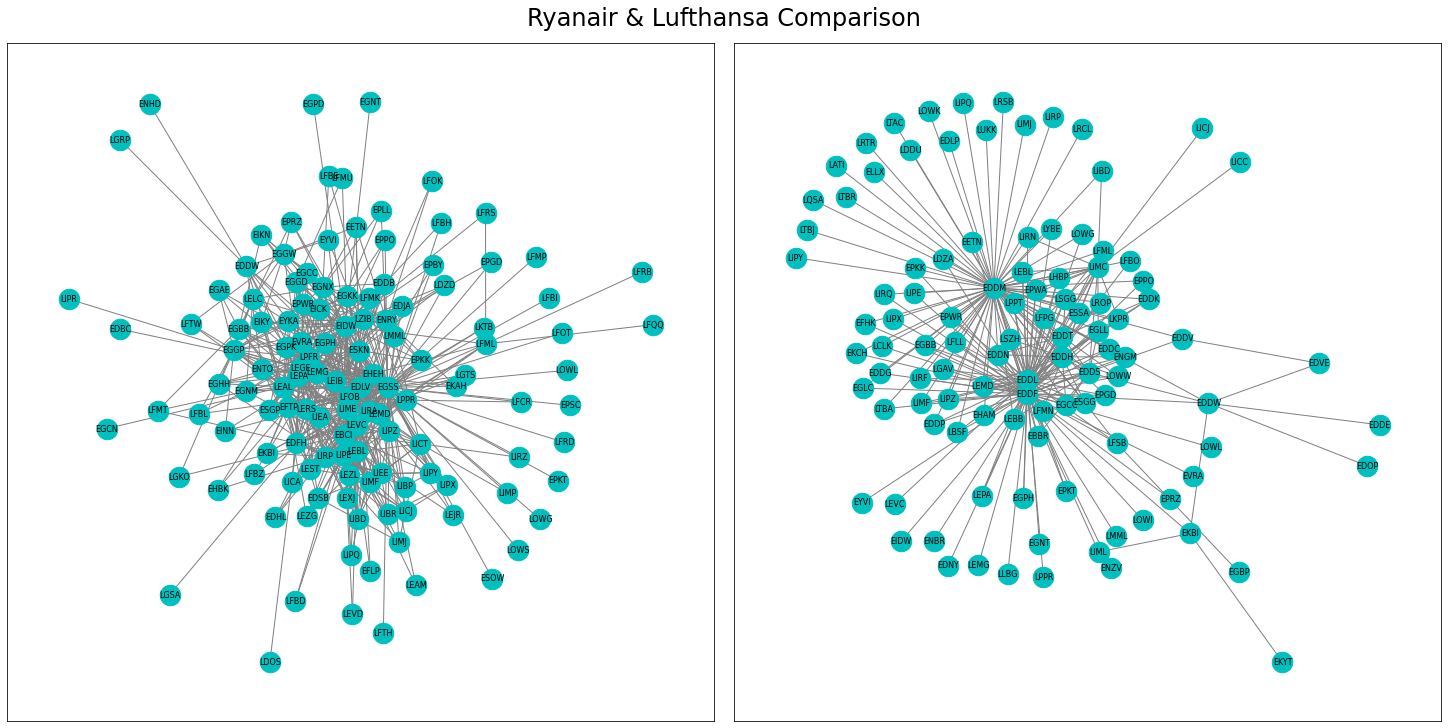

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,10),constrained_layout=True)

Luft = layer['Lufthansa']
Ryan = layer['Ryanair']

nx.draw_networkx(Luft, with_labels = True, pos = nx.spring_layout(Luft),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax2)
nx.draw_networkx(Ryan, with_labels = True, pos = nx.spring_layout(Ryan),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax1)

plt.suptitle('Ryanair & Lufthansa Comparison', fontsize=24)
plt.savefig('nw_RyLu.pdf')
plt.show()

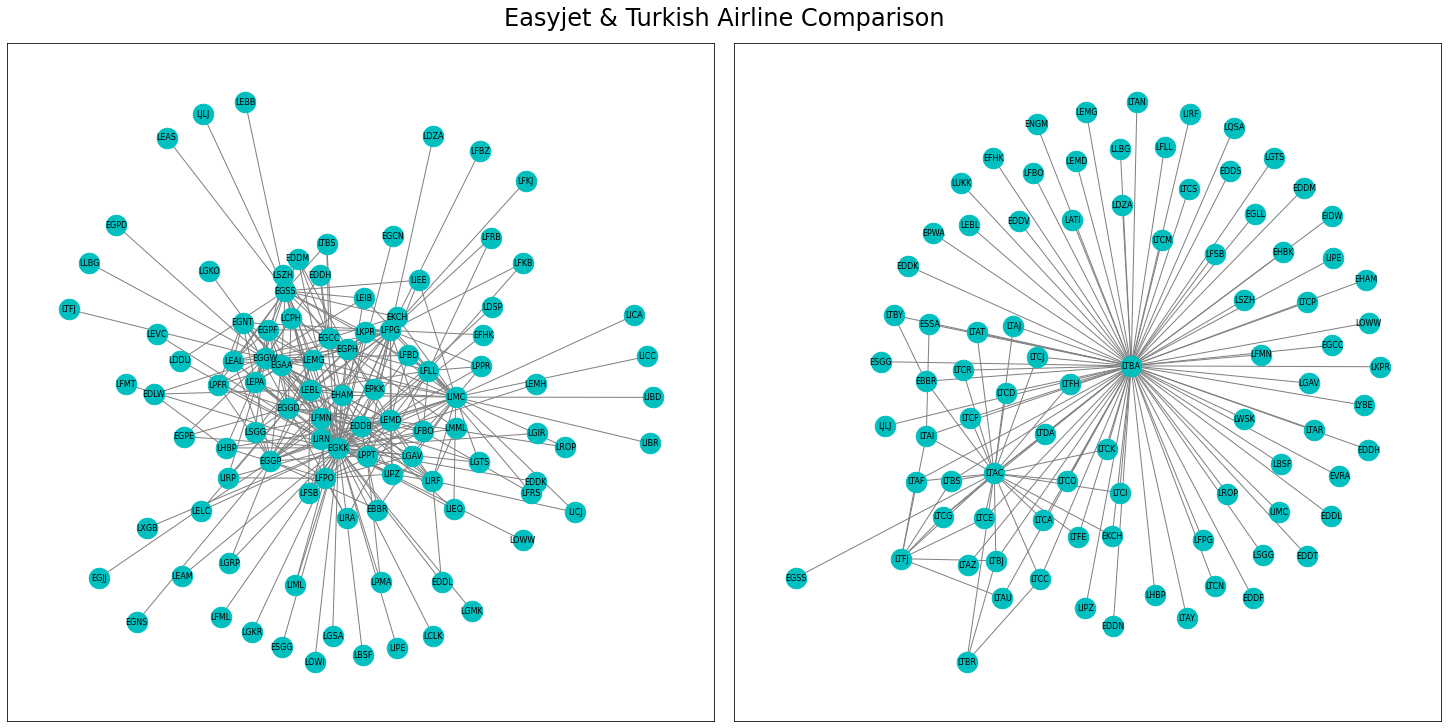

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,10),constrained_layout=True)

Easyjet = layer['Easyjet']
Turkey = layer['Turkish_Airlines']

nx.draw_networkx(Easyjet, with_labels = True, pos = nx.spring_layout(Easyjet),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax1)
nx.draw_networkx(Turkey, with_labels = True, pos = nx.spring_layout(Turkey),
                 node_color='c',node_size=420,edge_color="gray",font_size=8,ax = ax2)

plt.suptitle('Easyjet & Turkish Airline Comparison', fontsize=24)
plt.savefig('nw_EjTk.pdf')
plt.show()

In [ ]:
def draw_flight(al_name):
  g = layer[al_name]
  plt.figure(figsize=(10, 10))
  map = Basemap(projection='merc', resolution='c',
                llcrnrlat=20, urcrnrlat=75,
                llcrnrlon=-35, urcrnrlon=55,)
  pos = {}
  for n in g.nodes():
      x,y = map(g.nodes[n]['nodeLong'], g.nodes[n]['nodeLat'])
      pos[n] = (x,y)

  # draw map
  map.bluemarble(alpha=0.6)
  # map.shadedrelief()
  nx.draw_networkx(g, pos=pos, node_size=50, edge_color='b', node_color='pink',
                  arrows=False, with_labels=False, alpha=1, width=0.5, node_shape='.')
  plt.title(al_name + ' Flights')
  plt.savefig(f'geo_{al_name}.pdf')
  plt.show()

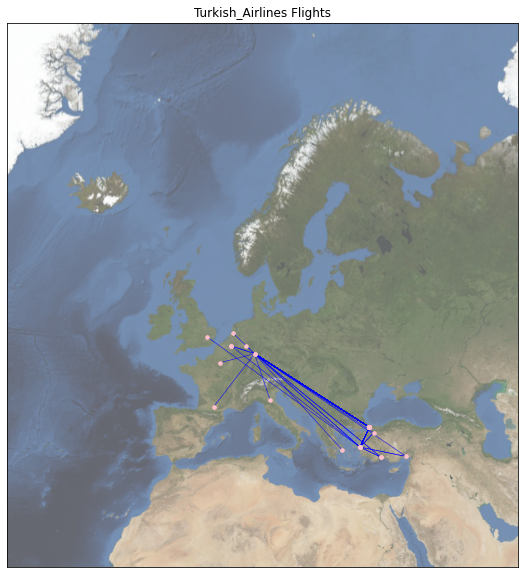

In [ ]:
draw_flight('Turkish_Airlines')

In [ ]:
def hub(airline, num):
  g = layer[airline]
  degree_list = sorted(g.degree, key=lambda x: x[1], reverse=True)

  for i,v in degree_list[:num]:
      node = g.nodes[i]['name']
      print(f'{node}: {v}')
hub("Finnair",3)

EFHK: 40
ESSA: 2
EFIV: 2


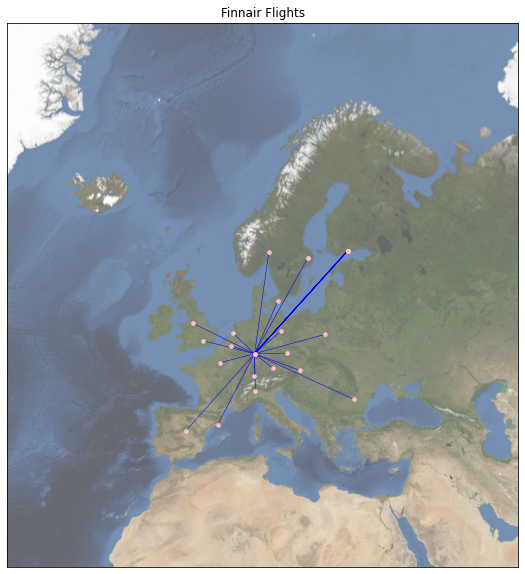

In [20]:
draw_flight('Finnair')

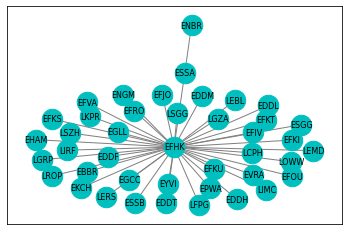

In [ ]:
Fin = layer["Finnair"]
nx.draw_networkx(Fin, with_labels = True, pos = nx.spring_layout(Fin),
                 node_color='c',node_size=420,edge_color="gray",font_size=8)

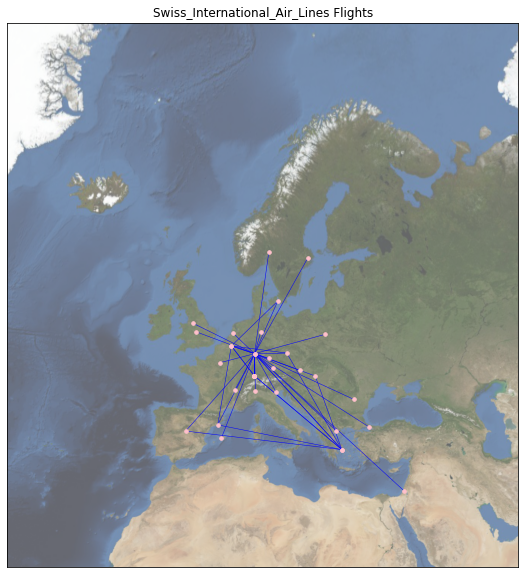

In [19]:
draw_flight('Swiss_International_Air_Lines')